# Exploratory Data Analysis (EDA) for dair-ai/emotion Dataset

This notebook performs EDA on the dair-ai/emotion dataset to understand its characteristics, including:
- Maximum sequence length (using TinyLlama tokenizer)
- Frequency of each emotion class
- Distribution of text lengths per class

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import AutoTokenizer
from collections import Counter

# Set plotting style
# plt.style.use('seaborn')
# sns.set_palette('husl')

In [ ]:
# Load the dataset
dataset = load_dataset('emotion')
train_data = dataset['train']

# Convert to pandas DataFrame
df = pd.DataFrame(train_data)

# Label mapping
label_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}
df['emotion'] = df['label'].map(label_map)

df.head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## 1. Class Frequency

Analyze the distribution of emotion classes.

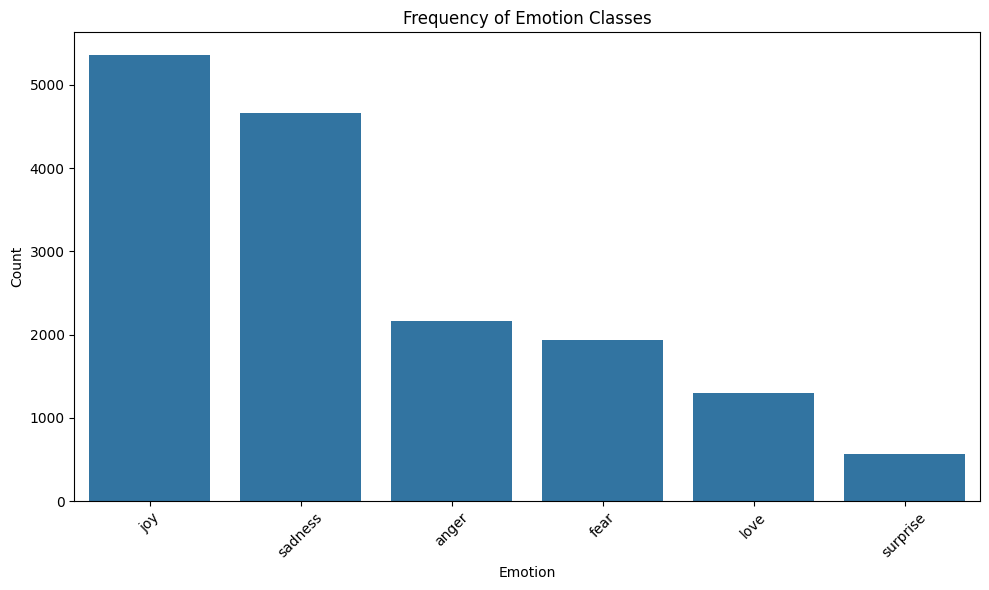

Class Counts:
emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [4]:
# Count frequency of each class
class_counts = df['emotion'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Frequency of Emotion Classes')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('emotion_class_frequency.png')
plt.show()

print('Class Counts:')
print(class_counts)

## 2. Text Length Distribution

Analyze the distribution of text lengths (in characters) for each class.

Text Length Statistics by Emotion:
           count        mean        std   min   25%   50%     75%    max
emotion                                                                 
anger     2159.0   96.911533  57.677478   9.0  51.0  85.0  132.00  298.0
fear      1937.0   96.123903  55.187941   9.0  54.0  85.0  126.00  296.0
joy       5362.0   98.554457  55.032087   9.0  56.0  89.0  130.00  300.0
love      1304.0  104.033742  55.145913  13.0  62.0  94.0  137.00  299.0
sadness   4666.0   92.550579  56.085306   7.0  49.0  80.0  122.75  299.0
surprise   572.0  101.676573  57.245763  12.0  58.0  88.5  132.25  287.0


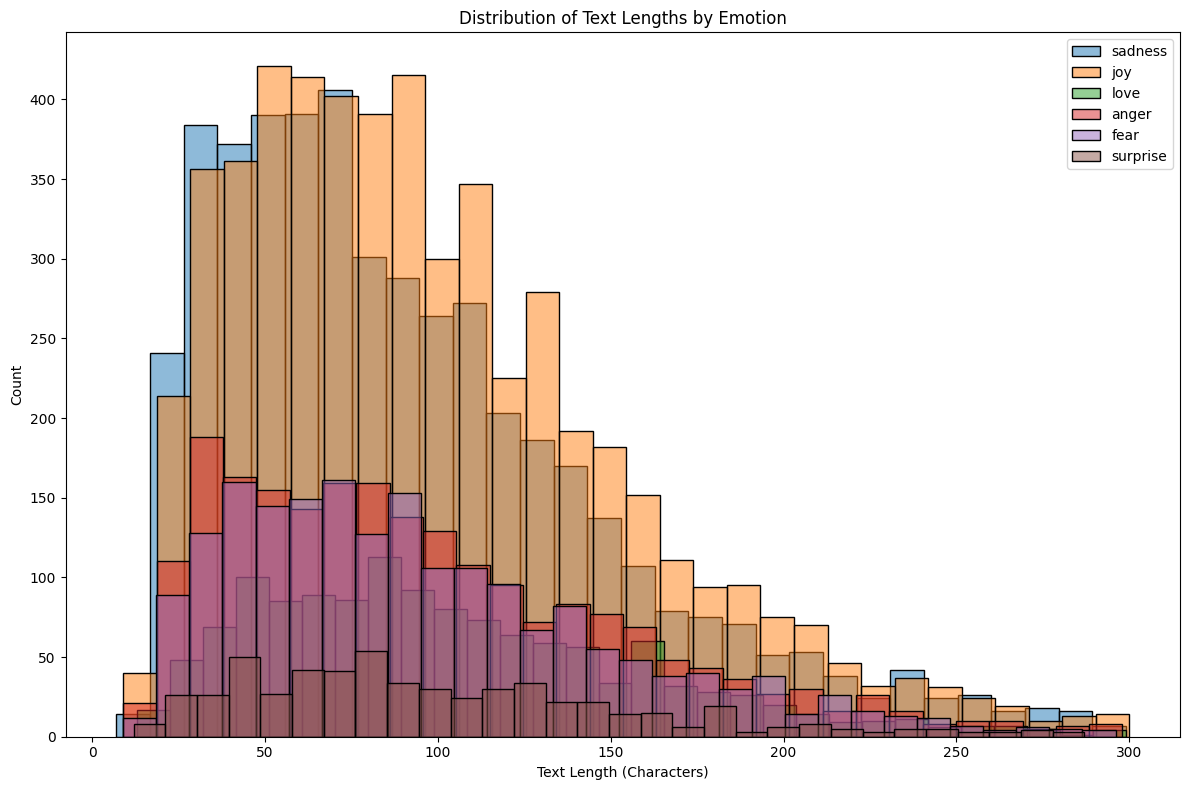

In [5]:
# Calculate text lengths
df['text_length'] = df['text'].apply(len)

# Summary statistics
print('Text Length Statistics by Emotion:')
print(df.groupby('emotion')['text_length'].describe())

# Plot distribution
plt.figure(figsize=(12, 8))
for emotion in label_map.values():
    sns.histplot(data=df[df['emotion'] == emotion], x='text_length', label=emotion, alpha=0.5, bins=30)
plt.title('Distribution of Text Lengths by Emotion')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig('text_length_distribution.png')
plt.show()

## 3. Maximum Sequence Length

Compute the sequence length using the TinyLlama tokenizer to determine the maximum sequence length.

/home/mrzaizai2k/anaconda3/envs/tinyllama/lib/python3.10/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Maximum Sequence Length: 84 tokens

Token Length Statistics by Emotion:
           count       mean        std  min   25%   50%   75%   max
emotion                                                            
anger     2159.0  22.553960  12.871423  2.0  12.0  20.0  30.0  72.0
fear      1937.0  21.973671  12.321822  3.0  13.0  19.0  29.0  84.0
joy       5362.0  22.103320  12.212924  2.0  13.0  20.0  29.0  76.0
love      1304.0  23.684816  12.270783  4.0  14.0  21.0  31.0  80.0
sadness   4666.0  21.335405  12.554397  2.0  12.0  18.0  28.0  80.0
surprise   572.0  22.968531  12.472417  3.0  13.0  20.0  31.0  63.0


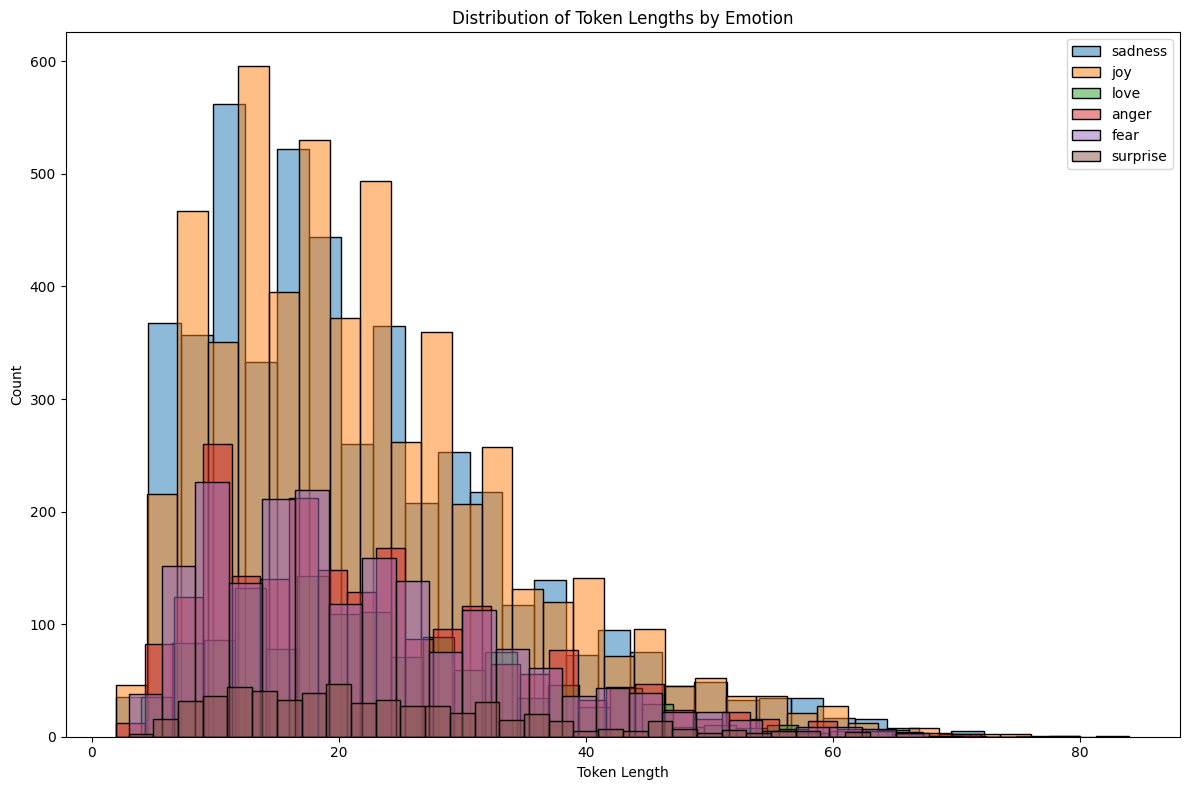

In [6]:
# Load tokenizer
model_name = 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T'
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Compute token lengths
df['token_length'] = df['text'].apply(lambda x: len(tokenizer(x, add_special_tokens=False)['input_ids']))

# Maximum sequence length
max_seq_length = df['token_length'].max()
print(f'Maximum Sequence Length: {max_seq_length} tokens')

# Summary statistics
print('\nToken Length Statistics by Emotion:')
print(df.groupby('emotion')['token_length'].describe())

# Plot distribution
plt.figure(figsize=(12, 8))
for emotion in label_map.values():
    sns.histplot(data=df[df['emotion'] == emotion], x='token_length', label=emotion, alpha=0.5, bins=30)
plt.title('Distribution of Token Lengths by Emotion')
plt.xlabel('Token Length')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig('token_length_distribution.png')
plt.show()

## Summary

- **Class Frequency**: The dataset shows varying frequencies of emotion classes, with some classes (e.g., sadness, joy) being more frequent.
- **Text Length**: Text lengths vary across emotions, with most texts being relatively short.
- **Sequence Length**: The maximum sequence length is {max_seq_length} tokens, useful for setting model parameters.
